In [392]:
import pandas as pd
import numpy as np
df=pd.read_csv('bank/bank-full.csv',delimiter=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [393]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

Since there are four columns with very high cardinality (>50 unique values)-  age, balance,duration and pdays, we will use the supervised ratio method using the TargetEncoder() from the category_encoders module. How the supervised ratio method works is for each unique catergory, it calculates the probability of that category belonging to the positive class, i.e. in this case, y=yes. Then, it replaces each of these categories with its corresponding supervised ratio values. We can then use label encoding for categories with low cardinality to convert label categories to number categories as the algorithm can only work with numbers

EDIT- Realised that there is no need for target encoding since all the above mentoned values are already numeric data and not categorical ones. For the existing categorical ones, LabelEncoders are enough.

Converting all binary values to binary integers

In [394]:
df['y']=df['y'].map({'yes': 1, 'no': 0})
df['default']=df['default'].map({'yes': 1, 'no': 0})
df['housing']=df['housing'].map({'yes': 1, 'no': 0})
df['loan']=df['loan'].map({'yes': 1, 'no': 0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [395]:
#from category_encoders import TargetEncoder
#encoder = TargetEncoder(smoothing=1.0)  # Adjust smoothing parameter as needed

In [396]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing values in this dataset

In [397]:
inputs=df.drop(columns='y') #training data
target=df['y'] #expected outcome
target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

To convert label categories to number categories as algorithm can only work with numbers

In [398]:
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_contact = LabelEncoder()
le_month = LabelEncoder()
le_poutcome = LabelEncoder()

inputs['job_n'] = le_job.fit_transform(df['job'])
inputs['marital_n'] = le_marital.fit_transform(df['marital'])
inputs['education_n'] = le_education.fit_transform(df['education'])
inputs['contact_n'] = le_contact.fit_transform(df['contact'])
inputs['month_n'] = le_month.fit_transform(df['month'])
inputs['poutcome_n'] = le_poutcome.fit_transform(df['poutcome'])
inputs.drop(columns=["job","marital","education","contact","poutcome","month"],inplace=True)
inputs.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_n,marital_n,education_n,contact_n,month_n,poutcome_n
0,58,0,2143,1,0,5,261,1,-1,0,4,1,2,2,8,3
1,44,0,29,1,0,5,151,1,-1,0,9,2,1,2,8,3
2,33,0,2,1,1,5,76,1,-1,0,2,1,1,2,8,3
3,47,0,1506,1,0,5,92,1,-1,0,1,1,3,2,8,3
4,33,0,1,0,0,5,198,1,-1,0,11,2,3,2,8,3


In [399]:
from sklearn.model_selection import train_test_split
X = inputs.copy()
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #setting aside 20% of data to test later

Creating the decision tree and training it

In [400]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

In [401]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Testing the decision tree

In [402]:
X_test #our test data (20% of original size)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_n,marital_n,education_n,contact_n,month_n,poutcome_n
23827,32,1,-1,0,0,29,185,2,-1,0,9,2,1,0,1,3
41446,19,0,527,0,0,4,154,3,-1,0,8,2,1,0,11,3
41123,67,0,585,0,0,17,109,1,-1,0,5,1,0,0,1,3
31202,33,0,218,1,1,2,169,4,-1,0,9,1,1,1,7,3
13388,44,0,233,0,1,9,150,3,-1,0,1,1,1,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15563,26,0,345,1,1,21,149,4,-1,0,2,1,3,0,5,3
7304,43,0,5342,1,0,29,689,2,-1,0,9,1,1,2,8,3
38123,39,0,43,0,0,15,354,8,-1,0,1,1,1,0,8,3
5795,45,0,18,1,0,26,90,2,-1,0,1,1,0,2,8,3


In [403]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [404]:
clf.predict_proba(X_test) #the probabilities vary because of limiting criteria for our tree such as min_split. These are probabilities that the value is 0, followed by 

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

The probabilities arent 1 because of ccp_alpha (Cost complexity Pruning) set to 0.01. These are probabilities that the value is 0, followed by probability of 1

To get accuracy of our prediction

In [405]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.869844078292602

To get true positives and true negatives rate

In [406]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[7369,  592],
       [ 585,  497]], dtype=int64)

When ccp_alpha was set to 0.01, it led to a rather confusing result. The model incorrectly predicted 1097 instances as negative when they were actually positive and did not correctly predict any instances as positive. One possible explanation is imbalanced data where the number of negative instances far outweighs the number of positive instances, meaning the model could not learn well. Resampling techniques may have to be implemented in the future.

In [407]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.45933456561922364

In [408]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.4563820018365473

The model performs poorly in identifying the correct class. Feature engineering will have to be perfomed in the future

In [409]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['yes', 'no']))

              precision    recall  f1-score   support

         yes       0.93      0.93      0.93      7961
          no       0.46      0.46      0.46      1082

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



In [410]:
feature_names = X.columns
clf.feature_importances_

array([0.09572295, 0.0006211 , 0.11496227, 0.02802618, 0.00839705,
       0.07781839, 0.30145092, 0.02890743, 0.05980218, 0.01084746,
       0.04172213, 0.01788416, 0.02213878, 0.05658323, 0.10280278,
       0.03231298])

<Axes: >

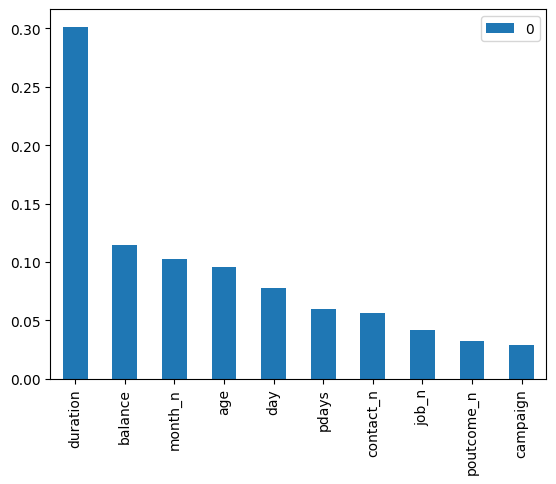

In [413]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

Importances of each category